In [270]:
import numpy as np
import matplotlib.pyplot as plt

In [271]:
from loaders import clean_text_for_pattern_letter
from temp_text import template_str
input_str = clean_text_for_pattern_letter(template_str, out_len=500)
print(len(input_str))
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u',
               'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '"', '\'', '1']
print(f'{letters=}')

len(letters)=32
500
letters=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', '.', ',', '"', "'", '1']


In [272]:
prev_n = 20

StatsDict: dict[str, dict] = {}

for inp_idx, inp_ltr in enumerate(input_str):
    if inp_idx == 0:
        continue
    
    for rev_idx in range(prev_n):
        prev_idx = inp_idx - rev_idx - 1

        if prev_idx <= 0:
            break

        prev_ltr = input_str[prev_idx]
        
        prev_stats = StatsDict.setdefault(prev_ltr, {})
        stats = prev_stats.setdefault(rev_idx, {})
        stats.setdefault(inp_ltr, 0)
        
        stats[inp_ltr] += 1

In [273]:
for sdk, sdv in StatsDict.items():
    print(sdk)
    for sd_k, sd_v in sdv.items():
        print(sd_k, sd_v)
    print('')

h
0 {'e': 13, 'a': 3, 'o': 1, 'i': 3, 'r': 1, ' ': 1}
1 {' ': 9, 'n': 1, 'a': 2, 'u': 1, 's': 3, 'o': 1, 't': 4, 'r': 1}
2 {'s': 3, 'p': 1, 'c': 4, 'n': 1, 'r': 2, 'l': 1, ' ': 3, 'u': 1, 'h': 1, 'd': 1, '.': 1, 'e': 1, 'i': 1, 'f': 1}
3 {'k': 1, 'o': 3, 'e': 2, 'd': 2, 'h': 3, 'w': 1, 'g': 1, 'r': 1, ' ': 3, 'm': 1, 'u': 1, 'p': 1, 'c': 1, 'i': 1}
4 {'y': 1, 'r': 2, 'l': 3, ' ': 3, 'o': 3, 'e': 1, 'a': 4, 'h': 1, '"': 1, 'b': 1, 'f': 1, 't': 1}
5 {' ': 2, 't': 3, 'o': 4, '.': 1, 's': 2, 'u': 1, 'r': 2, 'y': 1, 'c': 1, 'w': 2, 'i': 1, 'a': 1, 'l': 1}
6 {'a': 1, ' ': 5, 'r': 4, 'o': 2, 'l': 1, 'e': 2, 't': 2, 'd': 1, '.': 1, 's': 3}
7 {'b': 1, 'w': 2, ' ': 5, '"': 1, 'm': 2, 'd': 3, 't': 2, 'h': 1, 'o': 2, "'": 1, 'i': 1, 'u': 1}
8 {'o': 2, 'a': 4, 'i': 1, 'e': 3, ' ': 2, 'h': 2, 'w': 2, 'f': 1, '"': 1, 's': 1, 'v': 1, 'b': 1}
9 {'v': 1, 's': 2, 'f': 1, 't': 1, 'o': 3, 'r': 3, 'h': 1, ' ': 4, 'd': 1, 'i': 1, 'e': 2, 'j': 1}
10 {'e': 3, ' ': 6, "'": 1, 'n': 1, 'i': 1, 'o': 2, 'c': 1, 't'

In [274]:
TF = []
err = 0
for inp_idx, inp in enumerate(input_str):

    stats = []
    for rev_idx in range(prev_n):
        let_idx = inp_idx - rev_idx
        if let_idx < 0:
            break

        st = StatsDict[input_str[let_idx]].get(rev_idx, {})
        stats.append(st)
    # print(inp)
    for st in stats:
        st_sum = sum(st.values())

        for key, val in st.items():
            st[key] = val / st_sum

        # print(input_str[inp_idx + 1], max(st, key=st.get), st)
        
    letter_stats = {}
    for letter in letters:
        letter_stats.setdefault(letter, 0)

        for st in stats:
            st_let = st.get(letter, 0)

            if st_let == 0:
                letter_stats[letter] = 0
                break

            letter_stats[letter] += st_let

    max_key = max(letter_stats, key=letter_stats.get)
    # TF.append(sum(letter_stats.values()))
    # TF.append(letter_stats[max_key])

    ls_arr = np.array(list(letter_stats.values()))
    tf = np.sum(ls_arr > 0)
    
    # TF.append(tf)
    
    if inp_idx + 1 < len(input_str):
        print(input_str[inp_idx + 1], max_key, letter_stats[max_key], tf)

        if input_str[inp_idx + 1] != max_key:
            err += 1
    else:
        print('>', max_key, letter_stats[max_key], tf)
    print()

print(err, err / (len(input_str) / 100) )

h h 0.37037037037037035 12

e e 0.8872053872053872 5

    1.178200444157891 6

s c 0.5173136675335015 7

k   0.93803715222944 5

y   0.8299805613104381 1

    1.8401278052774341 1

a a 0 0

b   1.9598429245808573 1

o o 1.334904242724105 1

v   2.090994128969845 1

e e 2.5302780432084524 1

    2.7738883422667056 1

t a 0 0

h a 0 0

e e 3.0288516339887606 2

    4.030214387300587 1

p a 0 0

o o 2.2557610652637545 1

r a 0 0

t t 1.8950402367347141 1

    4.215808393302557 1

w w 1.984066577255301 1

a a 2.835677513104011 1

s s 2.4328402883039626 1

    4.933031833423153 1

t t 2.147931522873798 1

h h 2.164302032335963 1

e e 2.964502186545712 1

    5.255237655382372 1

c c 1.5937902711475076 1

o   3.565479563919476 2

l l 1.3888176415401996 1

o o 2.281066713516044 1

r   3.5182465807887313 2

    4.893845332621805 1

o o 1.68769908862908 1

f f 1.195575427260407 1

    4.581276658432394 1

t t 1.8876420338991178 1

e   4.008721638900134 2

l l 1.2605185619153927 1

e   3.9786651

In [275]:
sum_K = {}
for k_idx in range(prev_n):
    sum_K.setdefault(k_idx, {})

    for letter in letters:
        sum_K[k_idx].setdefault(letter, 0)

prev_sum = 0

for inp_idx, inp in enumerate(input_str):
    for k_idx in range(prev_n):
        for letter in letters:
            let_stats = StatsDict[inp][k_idx].get(letter, 0)

            if let_stats == 0:
                sum_K[k_idx][letter] = -1
                continue
            
            if sum_K[k_idx][letter] != -1:
                sum_K[k_idx][letter] += let_stats

    sumK = 0

    for k_idx in range(prev_n):
        # print(sum_K.values())
        sum_K_val = np.array(list(sum_K[k_idx].values()))
        # print(sum_K_val)
        sum_K_val[np.where(sum_K_val == -1)] = 0
        # print(sum_K_val)
        sumK += sum_K_val.sum()
    
    if sumK < prev_sum:
        for k_idx in range(prev_n):
            for letter in letters:
                sum_K[k_idx][letter] = 0
        
        sumK = 0
        
    prev_sum = sumK

    print(sumK)
    
    TF.append(sumK)

20.0
26.58658008658009
34.452464782622044
42.03482804536627
43.769643331810244
0
20.0
25.496657628388387
28.399000123115975
0
20.0
22.53682200152788
26.415573972139246
31.62789873072253
34.066332528690765
0
20.0
33.84950414002182
0
20.0
29.489420383538036
35.37002431120078
44.248081827834476
0
20.0
30.544552147889192
41.22200584073814
44.80312186243506
0
20.0
33.84950414002182
0
20.0
25.991919844861027
36.444046149928504
38.67014456132103
44.22720991381631
52.83884729604193
0
20.0
32.43995292860547
40.72604559433347
0
20.0
23.682166718059417
24.169002466851683
26.86452795679488
32.91162940607025
34.35528052229944
0
20.0
23.747547501815045
0
20.0
21.91904761904762
26.919265671115813
0
20.0
32.43995292860547
39.69363902094776
51.22171484692056
55.956535258606195
66.1002939328121
0
20.0
32.48755194337988
36.99162518538097
45.22196094052844
0
20.0
27.308874458874456
31.206493506493505
41.782683982683984
47.85287786013966
0
20.0
21.580494808241177
0
20.0
26.53059581320451
0
20.0
32.64370739

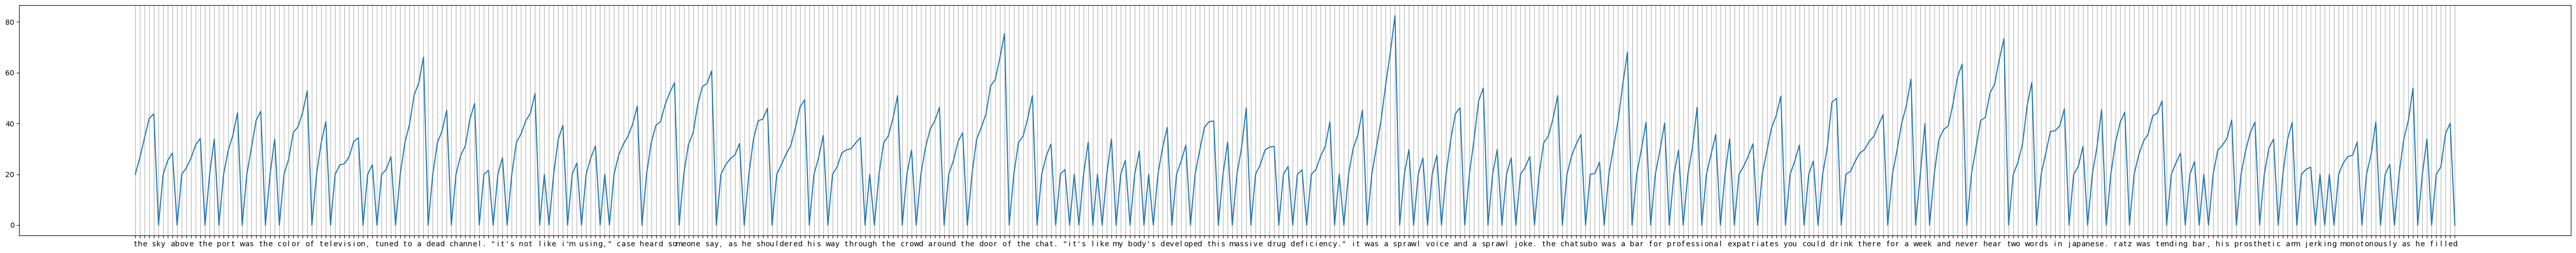

In [276]:
TF = np.array(TF)
# TF = TF - np.pad(TF, (1, 0))[:-1]
# # print(TF)
# TF[np.where(TF > 0)] = 0
# TF = np.abs(TF)
# TF[np.where(TF <= np.mean(TF))] = 0
# # TF[np.where(TF <= 0.5)] = 0
# print(TF.size, TF.max(), TF.min())

fig, axs = plt.subplots(1, 1, figsize=(50, 5), tight_layout=True)
axs.plot(np.arange(TF.size), TF)
axs.xaxis.set_ticks(np.arange(len(input_str)) ,input_str)
axs.xaxis.grid(True)

plt.show()